In [ ]:
import numpy as np
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples =1000, n_features=15, n_informative=7, n_redundant=8, flip_y=0.4, weights=[0.8])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import max_norm
from keras import regularizers
from keras.layers import GaussianNoise
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(units=17, activation='relu', input_dim=X_train.shape[1],kernel_constraint=max_norm(max_value=1.7)))
model.add(GaussianNoise(stddev=0.9))
model.add(Dense(units=17, activation='relu', kernel_regularizer=regularizers.l1(l1=0.01)))
model.add(Dense(units=17, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
mcallbacks =EarlyStopping(monitor = 'val_loss', mode = 'min',patience=20, verbose =1 )

In [ ]:
history = model.fit(X_train, y_train, batch_size = 50, epochs=300, validation_data=(X_test, y_test), verbose=0,callbacks=[mcallbacks])

Epoch 44: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


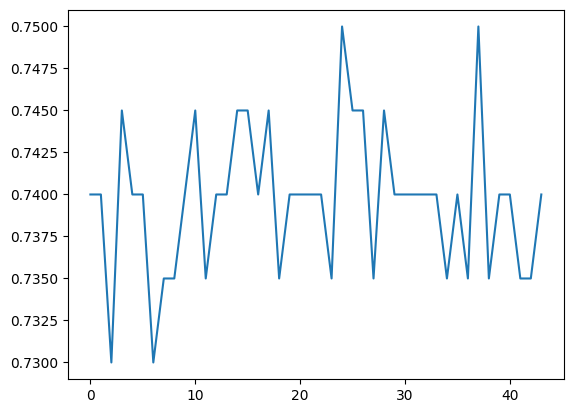

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# yourTree = DecisionTreeClassifier()
# yourTree.fit(X_train,y_train)
# print(yourTree(X_test, y_test)) 